In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import pandas as pd


In [2]:
#housing = pd.read_csv('housing.csv')
# dataset taken from https://www.kaggle.com/camnugent/california-housing-prices#x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)
#x_train.shape

In [21]:
# create dummy data
x_values = [i for i in range(25)]
x = np.array(x_values, dtype=np.float32)
x = x.reshape(-1, 1)

y_values = [2*i + 1 +  5*np.random.normal()  for i in x_values] # small noise added
y = np.array(y_values, dtype=np.float32)
y = y.reshape(-1, 1)
y.shape

(25, 1)

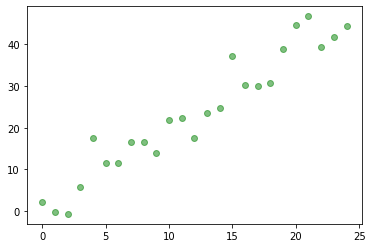

In [22]:
plt.plot(x, y, 'go', label='True data', alpha=0.5)

In [23]:
# simple linear regression model
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [28]:
inputDim = 1        
outputDim = 1      
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

In [29]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [30]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x).cuda())
        labels = Variable(torch.from_numpy(y).cuda())
    else:
        inputs = Variable(torch.from_numpy(x))
        labels = Variable(torch.from_numpy(y))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1427.811279296875
epoch 1, loss 12178.6796875
epoch 2, loss 104770.9765625
epoch 3, loss 902226.25
epoch 4, loss 7770344.5
epoch 5, loss 66922308.0
epoch 6, loss 576371392.0
epoch 7, loss 4964022784.0
epoch 8, loss 42752872448.0
epoch 9, loss 368211099648.0
epoch 10, loss 3171234086912.0
epoch 11, loss 27312395386880.0
epoch 12, loss 235229168009216.0
epoch 13, loss 2025921443790848.0
epoch 14, loss 1.744833685225472e+16
epoch 15, loss 1.5027454913544192e+17
epoch 16, loss 1.2942462696103608e+18
epoch 17, loss 1.1146746627811705e+19
epoch 18, loss 9.600183467786633e+19
epoch 19, loss 8.268197962386233e+20
epoch 20, loss 7.121021925004004e+21
epoch 21, loss 6.133011430112359e+22
epoch 22, loss 5.282083932622416e+23
epoch 23, loss 4.549218713695156e+24
epoch 24, loss 3.9180335621922895e+25
epoch 25, loss 3.374423786306252e+26
epoch 26, loss 2.9062364197043956e+27
epoch 27, loss 2.5030084211865777e+28
epoch 28, loss 2.155727242864613e+29
epoch 29, loss 1.85662898367501e+30
e

In [9]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x))).data.numpy()

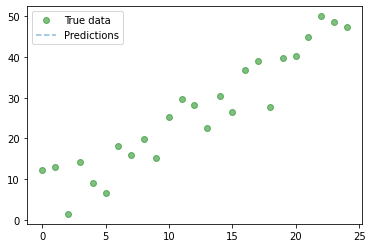

In [10]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [11]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[nan]])
linear.bias tensor([nan])


In [12]:
# let's delete point at index 2
x_d = np.delete(x, [i for i in range(10, 15)])
y_d = np.delete(y, [i for i in range(10, 15)])
x_d = x_d.reshape(-1, 1)
y_d = y_d.reshape(-1, 1)

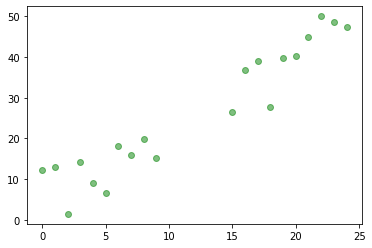

In [13]:
plt.plot(x_d, y_d, 'go', label='True data', alpha=0.5)

In [14]:
inputDim = 1        
outputDim = 1      
learningRate = 0.01 
epochs = 100

model_retrain = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model_retain.cuda()

In [15]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model_retrain.parameters(), lr=learningRate)

In [16]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_d).cuda())
        labels = Variable(torch.from_numpy(y_d).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_d))
        labels = Variable(torch.from_numpy(y_d))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model_retrain(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(783.5491, grad_fn=<MseLossBackward>)
epoch 0, loss 783.549072265625
tensor(7659.7241, grad_fn=<MseLossBackward>)
epoch 1, loss 7659.72412109375
tensor(77363.0781, grad_fn=<MseLossBackward>)
epoch 2, loss 77363.078125
tensor(783932.3750, grad_fn=<MseLossBackward>)
epoch 3, loss 783932.375
tensor(7946285., grad_fn=<MseLossBackward>)
epoch 4, loss 7946285.0
tensor(80549576., grad_fn=<MseLossBackward>)
epoch 5, loss 80549576.0
tensor(8.1651e+08, grad_fn=<MseLossBackward>)
epoch 6, loss 816514048.0
tensor(8.2768e+09, grad_fn=<MseLossBackward>)
epoch 7, loss 8276833280.0
tensor(8.3901e+10, grad_fn=<MseLossBackward>)
epoch 8, loss 83900555264.0
tensor(8.5048e+11, grad_fn=<MseLossBackward>)
epoch 9, loss 850482692096.0
tensor(8.6212e+12, grad_fn=<MseLossBackward>)
epoch 10, loss 8621168001024.0
tensor(8.7391e+13, grad_fn=<MseLossBackward>)
epoch 11, loss 87391024971776.0
tensor(8.8586e+14, grad_fn=<MseLossBackward>)
epoch 12, loss 885864922087424.0
tensor(8.9798e+15, grad_fn=<MseLossBac

In [17]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted_d = model_retrain(Variable(torch.from_numpy(x_d).cuda())).cpu().data.numpy()
    else:
        predicted_d = model_retrain(Variable(torch.from_numpy(x_d))).data.numpy()

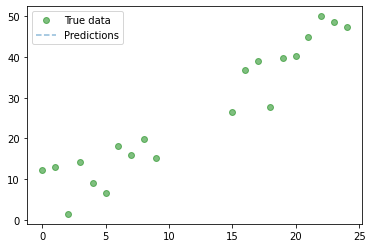

In [18]:
plt.clf()
plt.plot(x_d, y_d, 'go', label='True data', alpha=0.5)
plt.plot(x_d, predicted_d, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [19]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[nan]])
linear.bias tensor([nan])


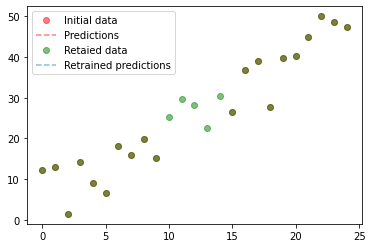

In [20]:
plt.clf()
plt.plot(x_d, y_d, 'go', color='red', label='Initial data', alpha=0.5)
plt.plot(x_d, predicted_d, '--', c='red', label='Predictions', alpha=0.5)
plt.plot(x, y, 'go', label='Retaied data', alpha=0.5)
plt.plot(x, predicted, '--', label='Retrained predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()